In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d  shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
replace mitbih_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train=pd.read_csv('/content/mitbih_train.csv')
df_train

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [6]:
df_train.shape

(87553, 188)

In [7]:
df_train.columns=[f'f{i+1}'for i in range(len(df_train.columns)-1)]+['target']
df_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,target
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, f1 to target
dtypes: float64(188)
memory usage: 125.6 MB


In [9]:
df_train.isnull().sum()

,0
f1,0
f2,0
f3,0
f4,0
f5,0
...,...
f184,0
f185,0
f186,0
f187,0


In [10]:
df_train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,target
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
df_train.duplicated().value_counts()

,count
False,87553


In [12]:
df_train.target.value_counts()

,count
target,
0.0,72470
4.0,6431
2.0,5788
1.0,2223
3.0,641


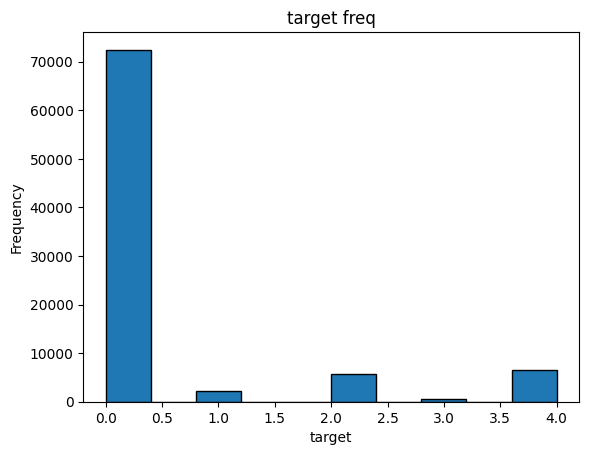

In [13]:
plt.hist(df_train['target'], edgecolor='black')
plt.title('target freq')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.show()


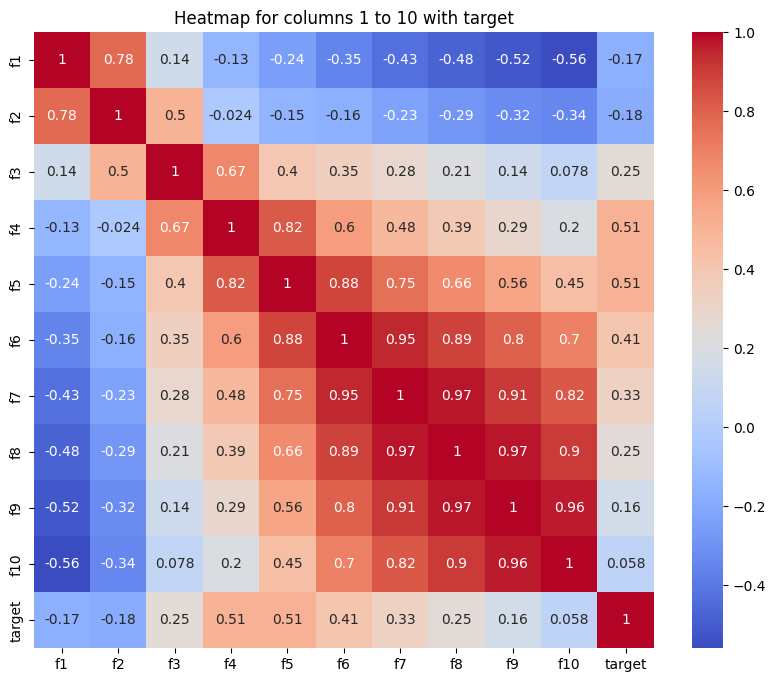

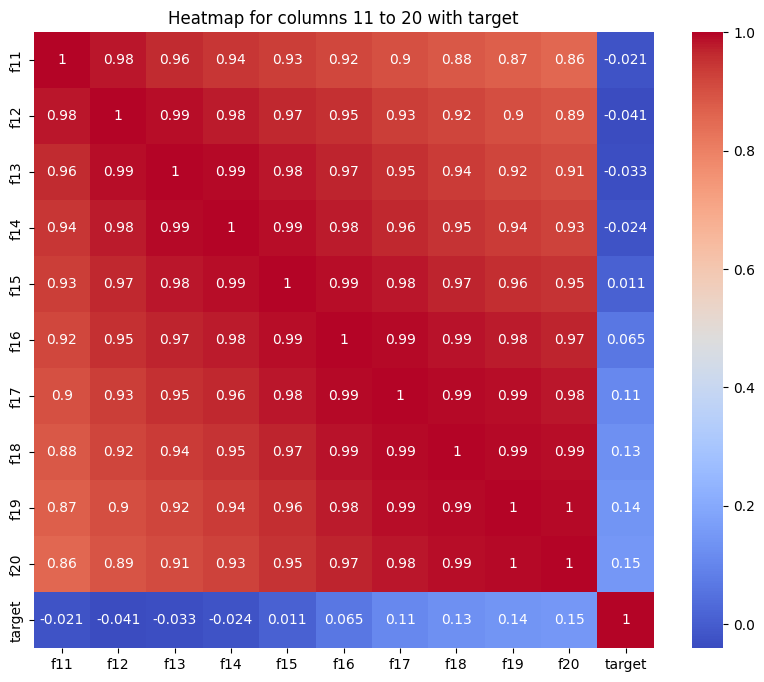

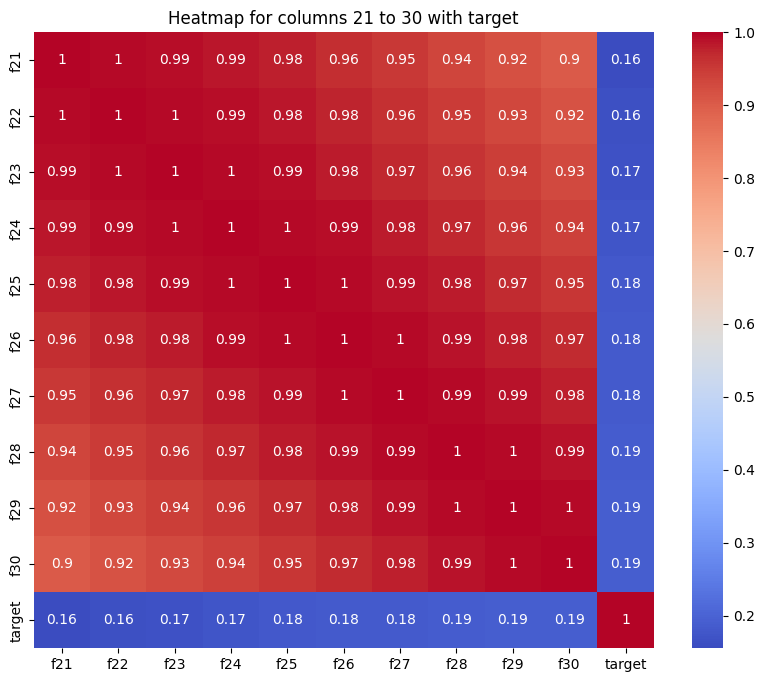

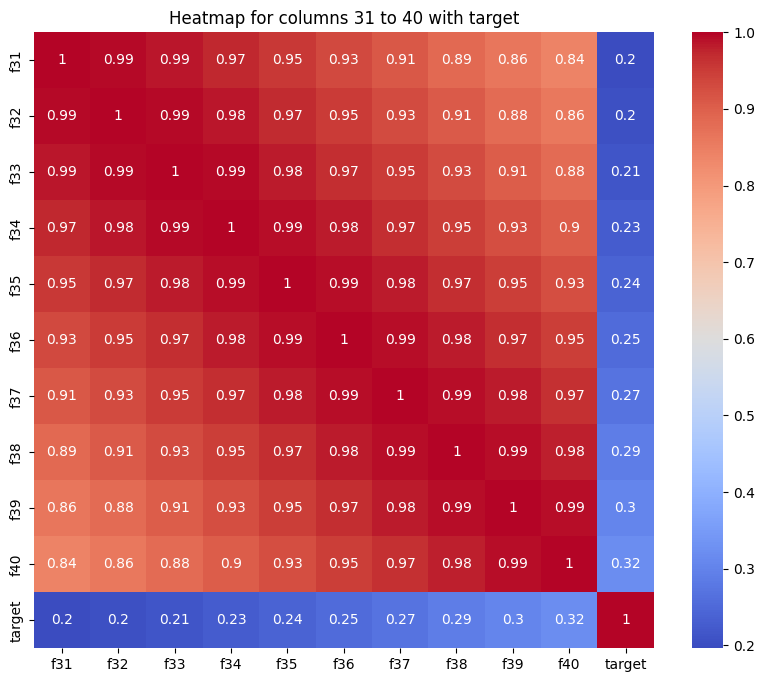

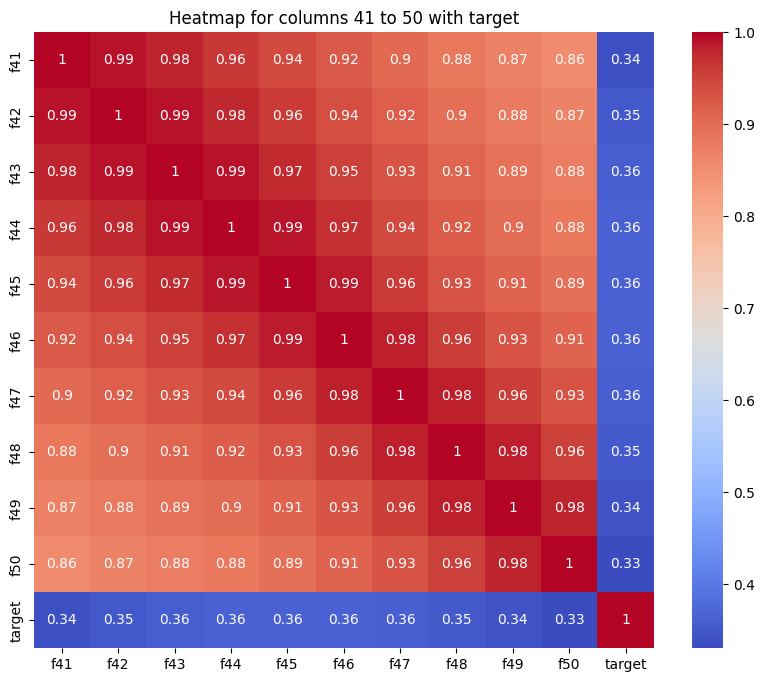

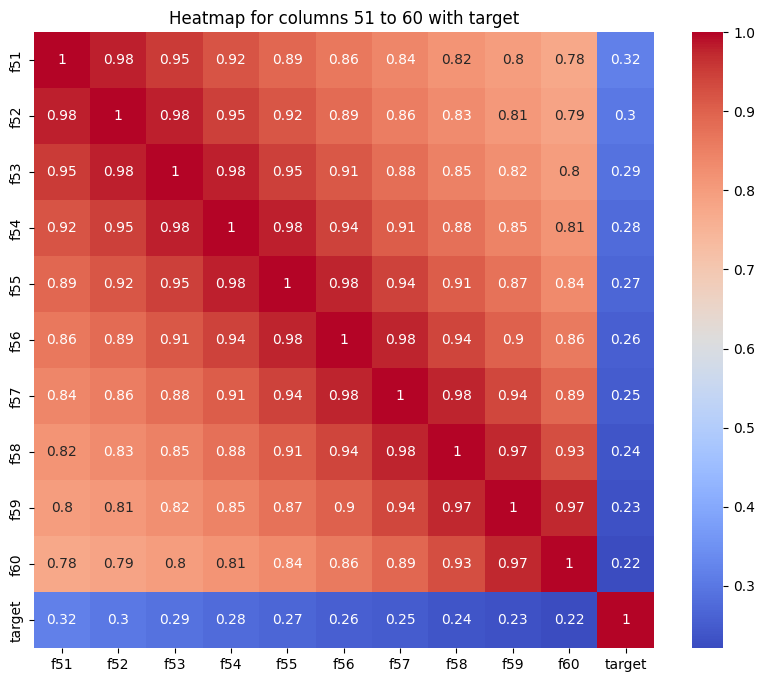

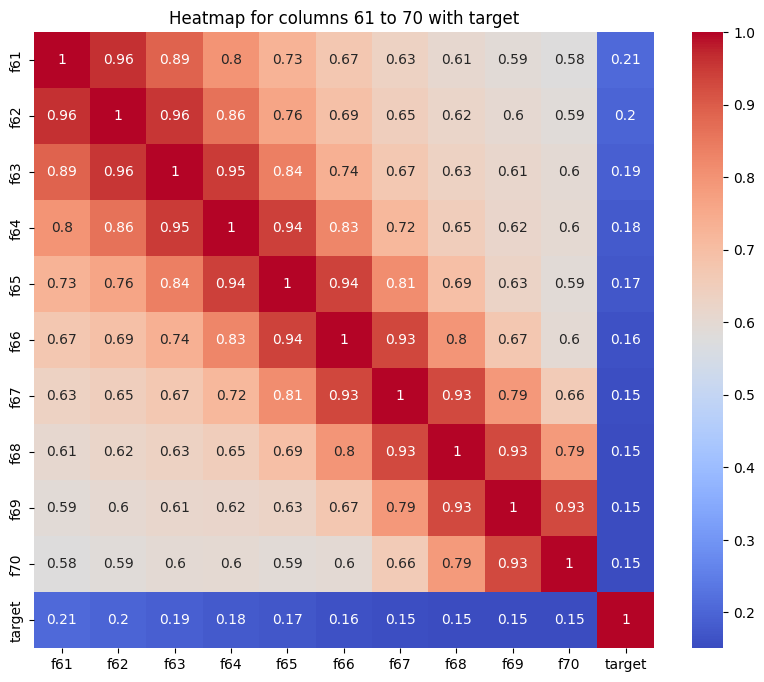

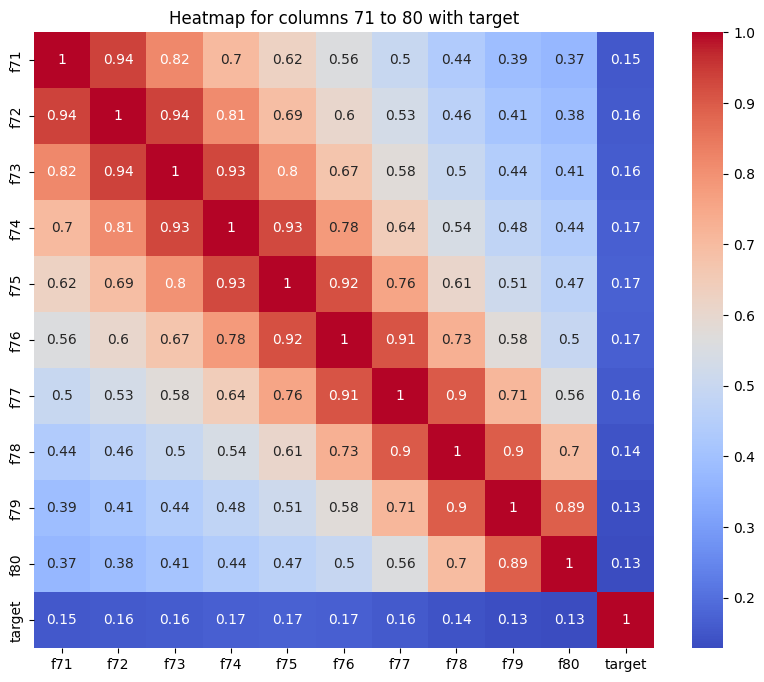

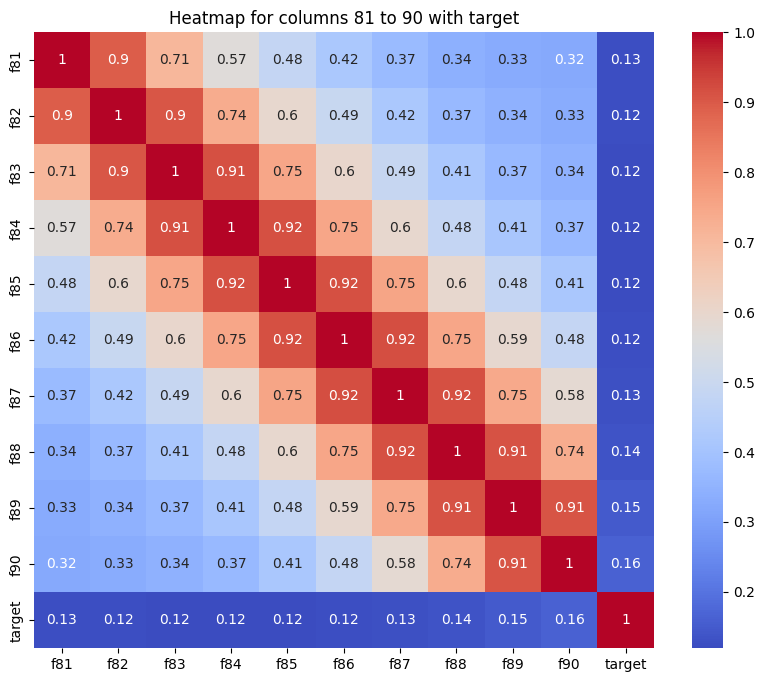

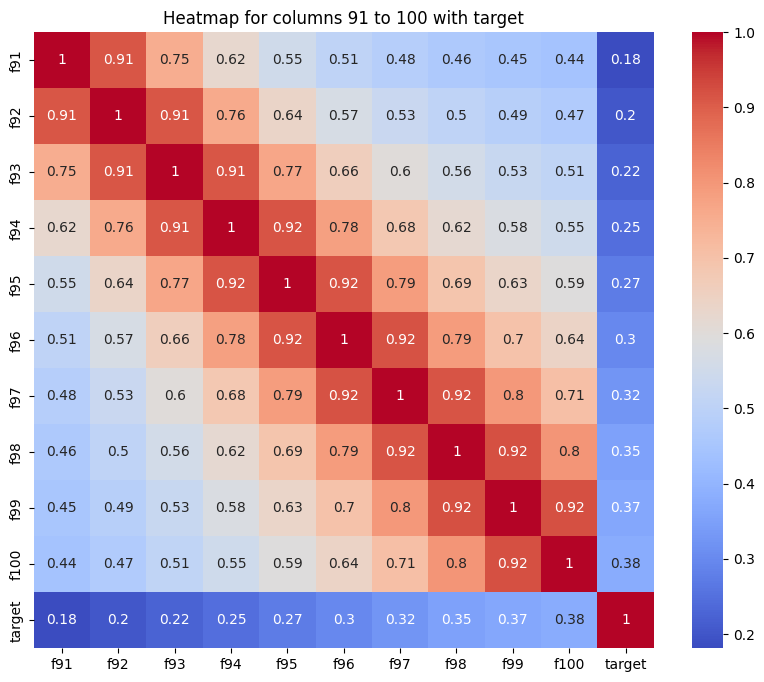

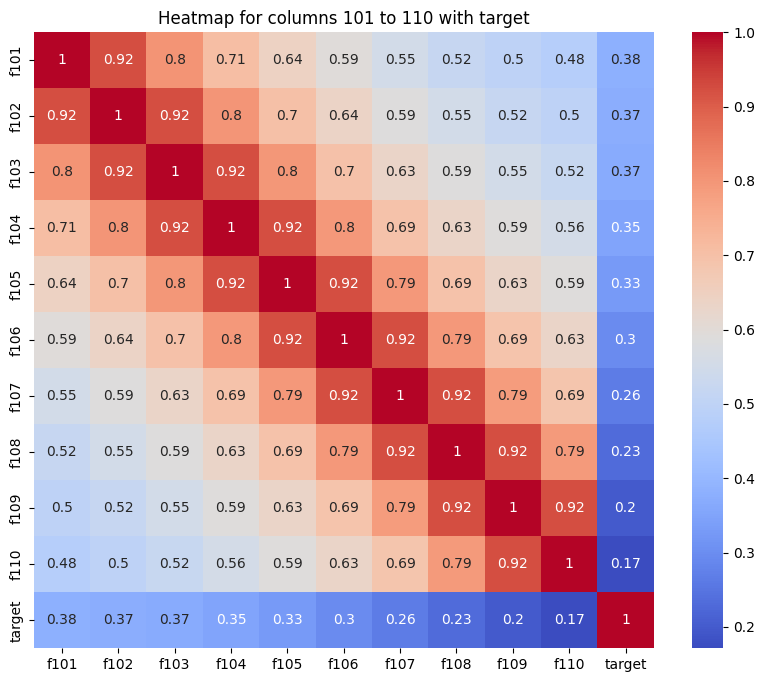

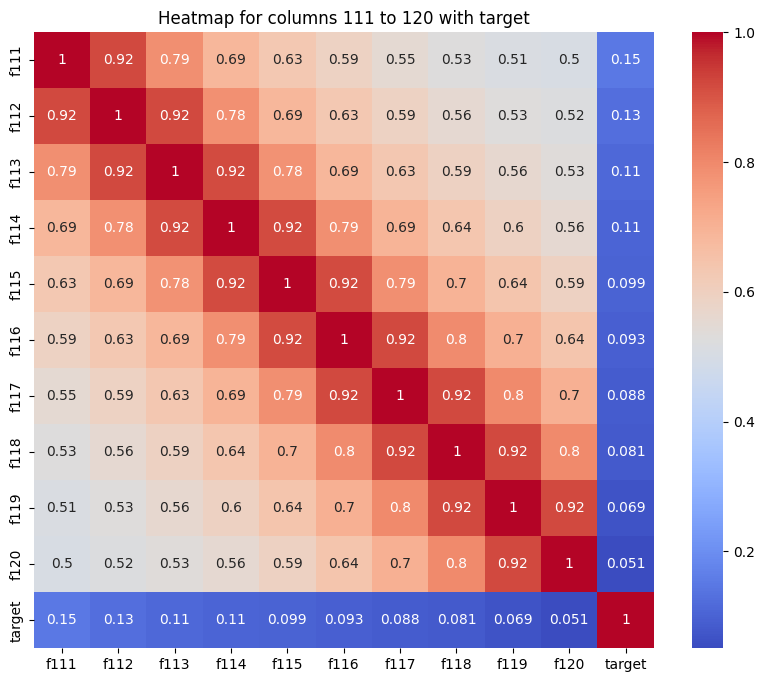

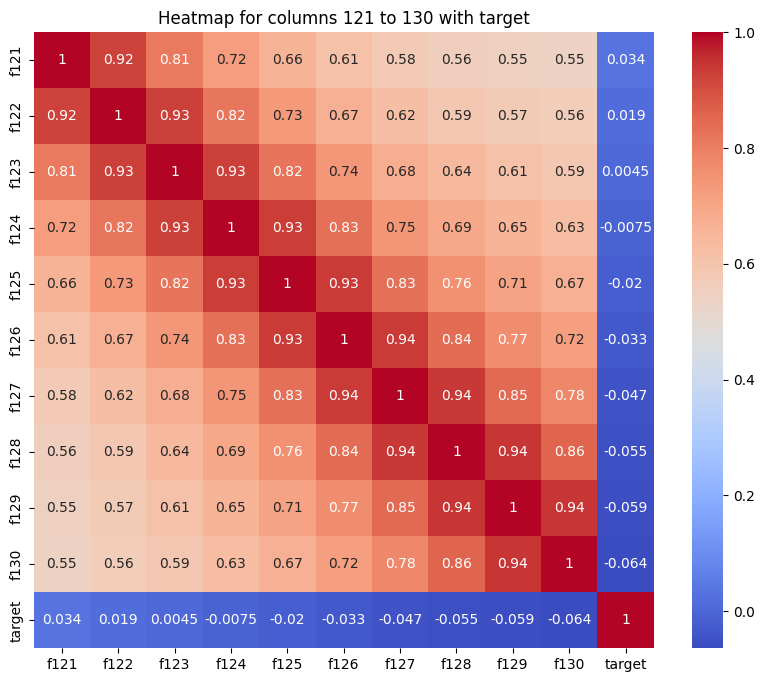

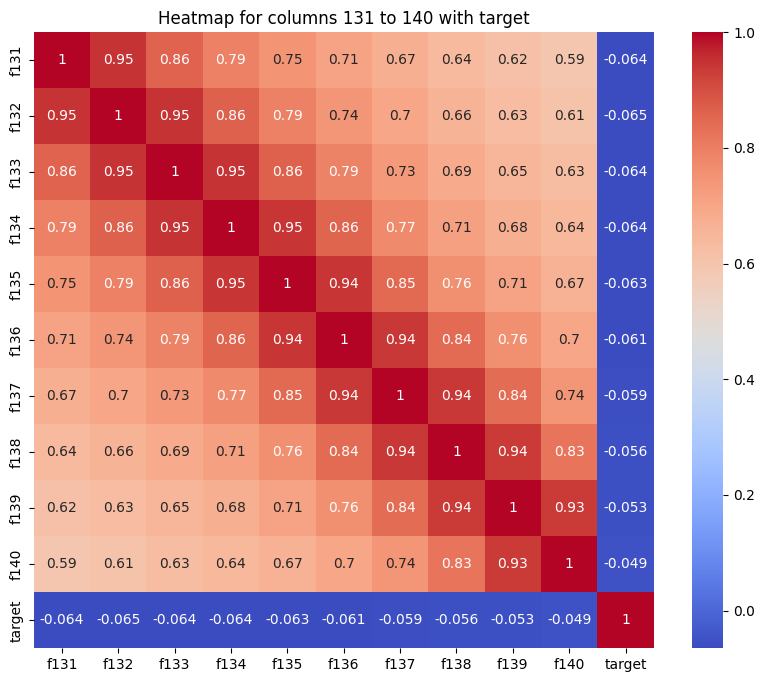

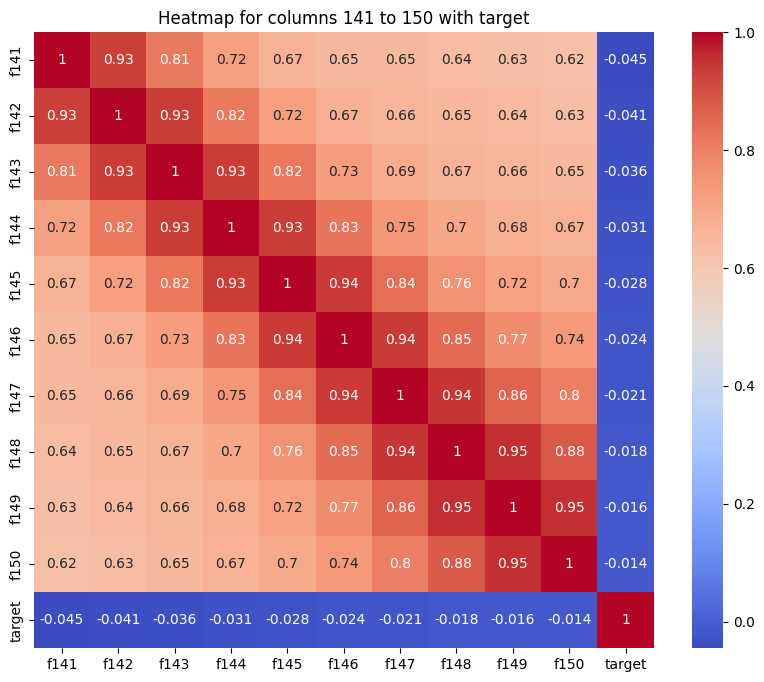

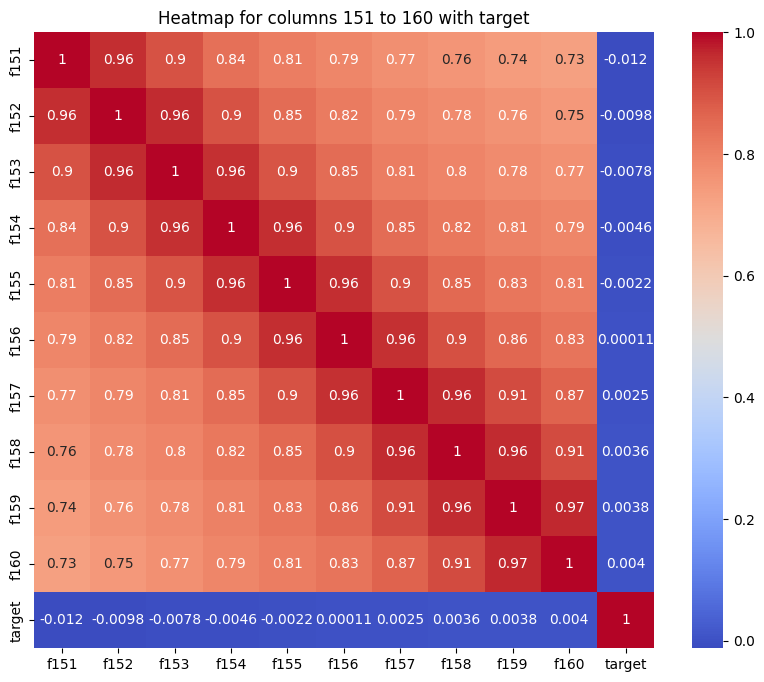

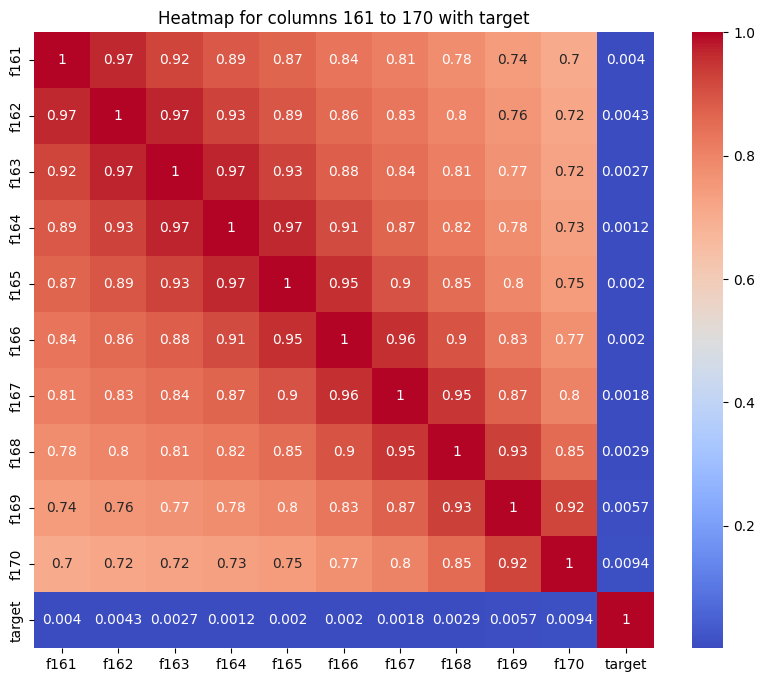

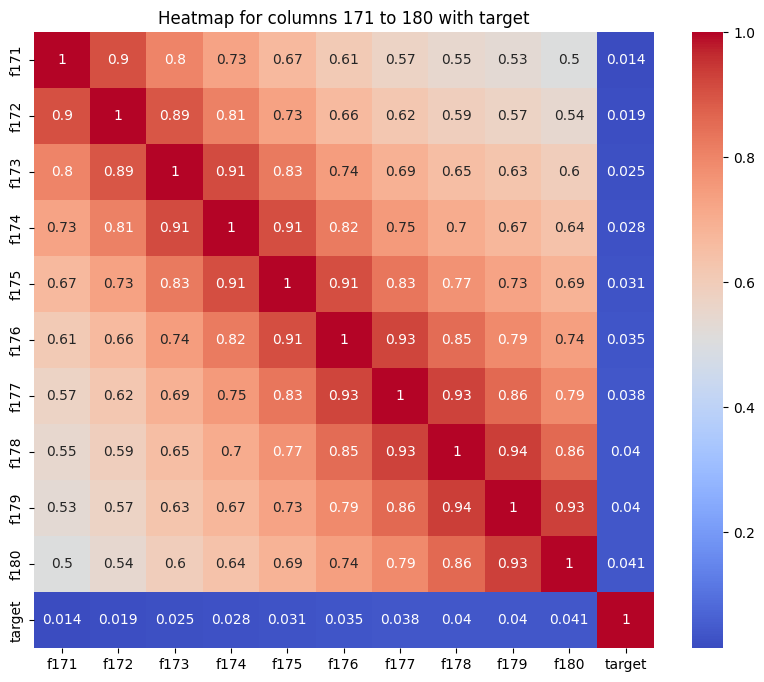

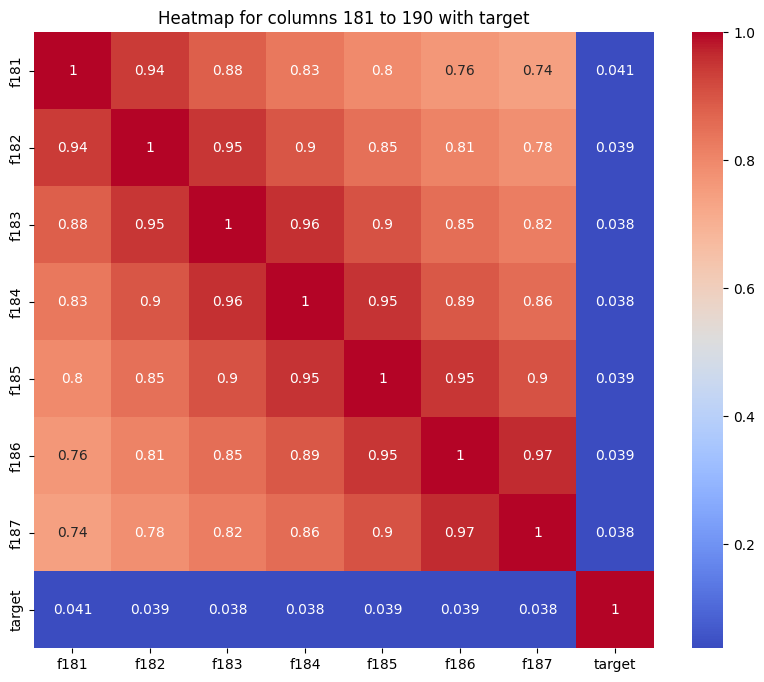

In [14]:
target = 'target'
def create_heatmaps_with_target(df_train, target, step=10):
    num_columns = df_train.shape[1]
    for i in range(0, num_columns, step):
        subset_columns = df_train.columns[i:i+step].tolist()
        if target not in subset_columns:
            subset_columns.append(target)
        subset = df_train[subset_columns]
        plt.figure(figsize=(10, 8))
        sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for columns {i+1} to {i+step} with target')
        plt.show()
create_heatmaps_with_target(df_train, target)

In [15]:
#df_train.drop(columns=df_train.loc[:,'f146':'f173'].columns,inplace=True)
#df_train.drop(columns=df_train.loc[:,'f122':'f125'].columns,inplace=True)
#df_train.drop(columns=['f15'],inplace=True)
df_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,target
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [16]:
df_sorted=df_train.sort_values(by='target')
df_sorted

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,target
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48305,0.872881,0.754237,0.317797,0.088983,0.084746,0.093220,0.055085,0.046610,0.038136,0.033898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48306,0.967213,0.885246,0.311475,0.000000,0.102004,0.109290,0.105647,0.094718,0.092896,0.100182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48307,1.000000,0.513587,0.116848,0.073370,0.095109,0.067935,0.081522,0.062500,0.073370,0.065217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48308,0.949622,0.891688,0.763224,0.319899,0.098237,0.128463,0.141058,0.062972,0.032746,0.017632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83260,1.000000,0.650980,0.600000,0.576471,0.541176,0.505882,0.470588,0.407843,0.341176,0.192157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83259,0.930540,0.883131,0.825799,0.771775,0.693495,0.587652,0.488423,0.378170,0.255788,0.176406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83258,0.934673,0.874372,0.796482,0.739950,0.650754,0.564070,0.444724,0.350503,0.252513,0.214824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83268,0.691131,0.553517,0.532110,0.492355,0.461774,0.403670,0.382263,0.321101,0.266055,0.137615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [17]:
df_sorted=df_sorted.iloc[50000:,:]
df_sorted.shape

(37553, 188)

In [18]:
df_sorted

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,target
7393,0.975309,0.895062,0.472222,0.219136,0.132716,0.098765,0.055556,0.012346,0.003086,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7374,1.000000,0.844237,0.507788,0.314642,0.249221,0.211838,0.186916,0.143302,0.133956,0.118380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7373,0.466302,0.397086,0.289617,0.216758,0.204007,0.194900,0.193078,0.196721,0.196721,0.207650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7372,1.000000,0.770619,0.203608,0.100515,0.224227,0.309278,0.337629,0.342784,0.347938,0.340206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7371,1.000000,0.922566,0.345133,0.152655,0.258850,0.365044,0.371681,0.376106,0.369469,0.376106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83260,1.000000,0.650980,0.600000,0.576471,0.541176,0.505882,0.470588,0.407843,0.341176,0.192157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83259,0.930540,0.883131,0.825799,0.771775,0.693495,0.587652,0.488423,0.378170,0.255788,0.176406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83258,0.934673,0.874372,0.796482,0.739950,0.650754,0.564070,0.444724,0.350503,0.252513,0.214824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83268,0.691131,0.553517,0.532110,0.492355,0.461774,0.403670,0.382263,0.321101,0.266055,0.137615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_sorted.drop('target',axis=1))
scaled_features = scaler.transform(df_sorted.drop('target',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df_sorted.columns[:-1])

linear regression is a bad choice as it is classification not regression and i will prove

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
x=df_feat
y=df_sorted['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42)

In [23]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE to upsample only class 3
smote = SMOTE(sampling_strategy={3: Counter(y_train)[3]*4}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_predict = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.6547290014577981
Mean Squared Error: 0.8052568493592769
Root Mean Squared Error: 0.8973610473824217
R-squared: 0.6560219659842866


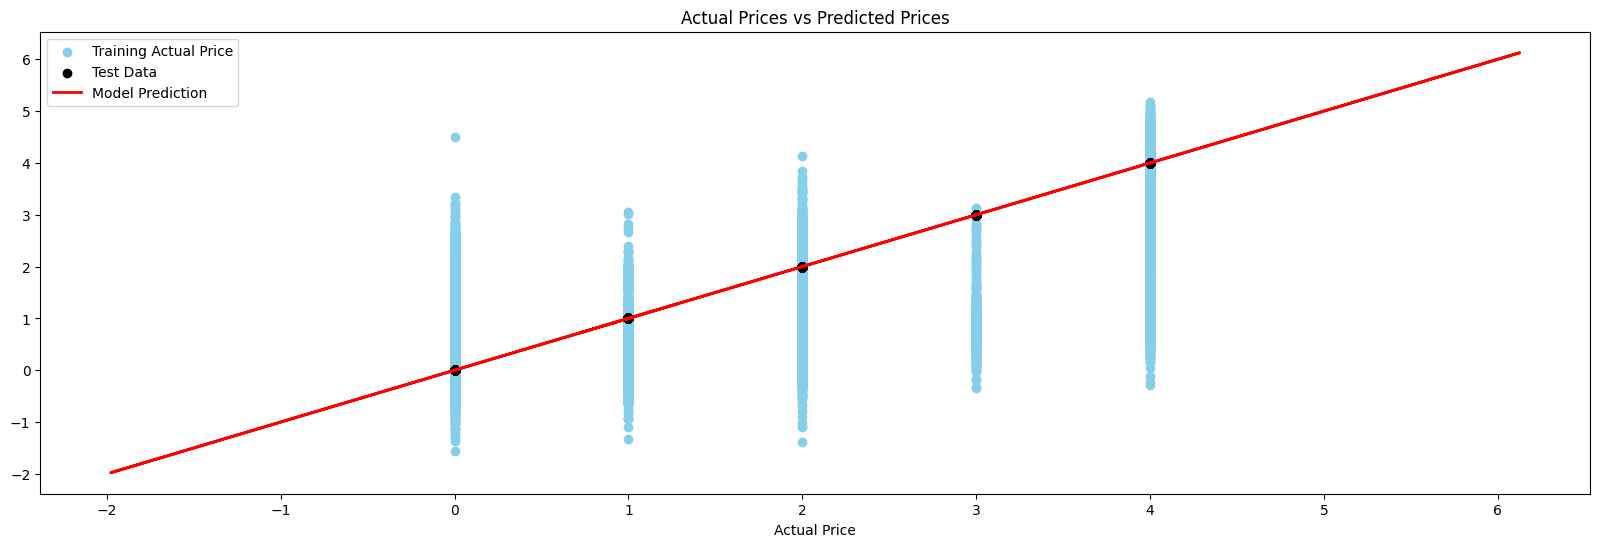

In [28]:
plt.figure(figsize=(20, 6))  # Set figure size to 10x6 inches

# Scatter plot for training actual prices
plt.scatter(y_train, model.predict(X_train), color='skyblue', label='Training Actual Price')

# Scatter plot for test data
plt.scatter(y_test, y_test, color='Black', label='Test Data')

# Plotting Model's Prediction Line
plt.plot(y_predict, y_predict, color='red', linestyle='-', linewidth=2, label='Model Prediction')

# Setting Labels and Title
plt.xlabel("Actual Price")
plt.title("Actual Prices vs Predicted Prices")

# Displaying Legend
plt.legend()

# Showing the Plot
plt.show()

linear regression is a bad choice as it is classification not regression

In [29]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [30]:
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_predict = model2.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.8404935203266466
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      6741
         1.0       0.85      0.52      0.65       700
         2.0       0.69      0.61      0.65      1709
         3.0       0.55      0.37      0.44       202
         4.0       0.95      0.90      0.92      1914

    accuracy                           0.84     11266
   macro avg       0.78      0.67      0.71     11266
weighted avg       0.84      0.84      0.83     11266



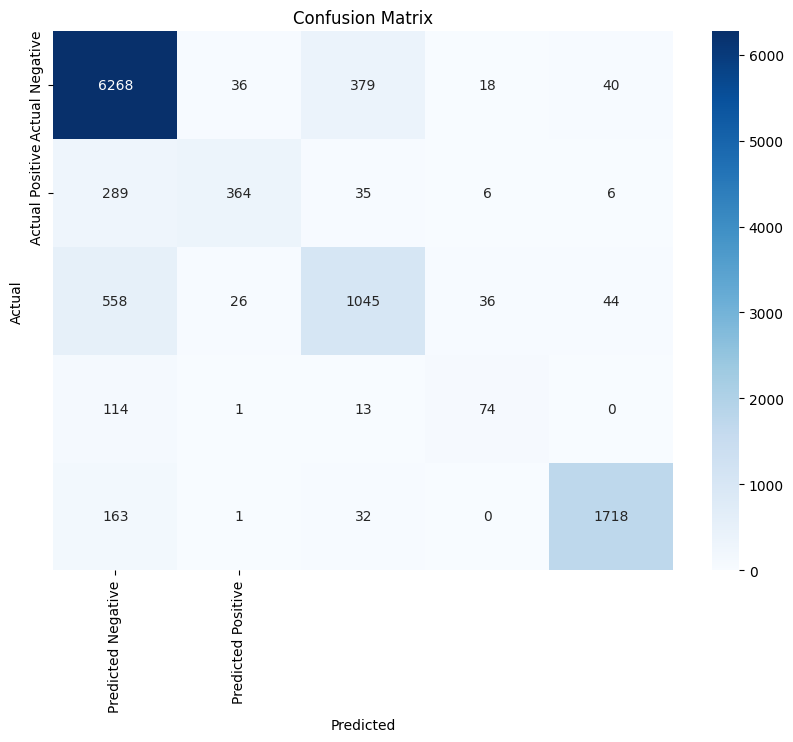

In [33]:
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.svm import SVC

In [35]:
model3=SVC(kernel='poly',degree=3,coef0=1)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9437244807385052

In [36]:
predict=model3.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, predict)
class_report = classification_report(y_test, predict)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.9437244807385052
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      6741
         1.0       0.93      0.65      0.76       700
         2.0       0.95      0.91      0.93      1709
         3.0       0.83      0.55      0.66       202
         4.0       0.99      0.96      0.98      1914

    accuracy                           0.94     11266
   macro avg       0.93      0.81      0.86     11266
weighted avg       0.94      0.94      0.94     11266



In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model4=DecisionTreeClassifier(max_depth=3,random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.7939818924196698

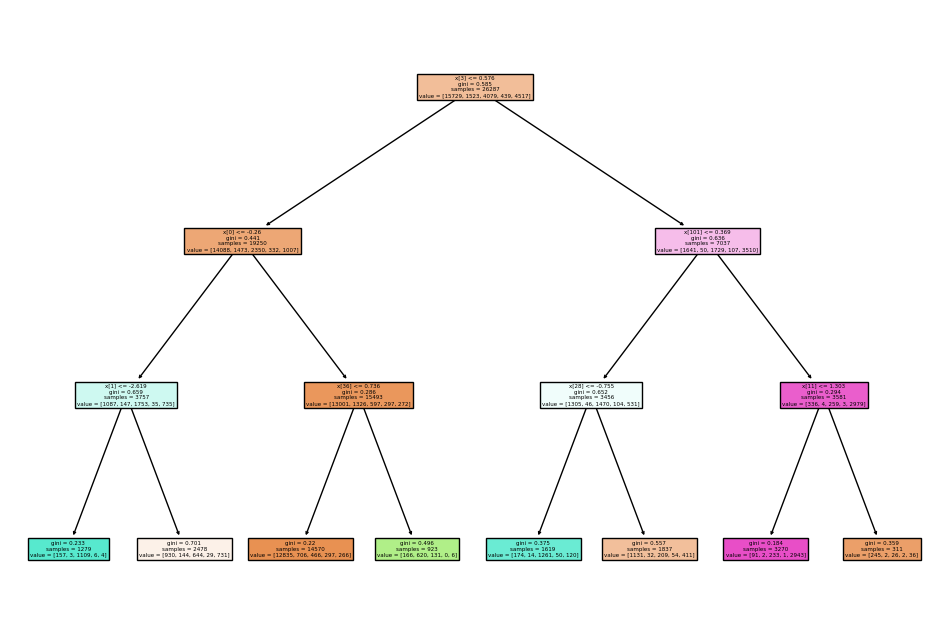

In [39]:
plt.figure(figsize=(12,8))
plot_tree(model4, filled=True,)
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=30,random_state=42)
model5.fit(X_train,y_train)
model5.score(X_test,y_test)

0.9472749866856027

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_sorted.drop('target',axis=1))
scaled_features = scaler.transform(df_sorted.drop('target',axis=1))
train_df = pd.DataFrame(scaled_features,columns=df_sorted.columns[:-1])

In [42]:
from sklearn.neighbors import KNeighborsClassifier
X=train_df
Y=df_sorted['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=42)


Text(0, 0.5, 'Error Rate')

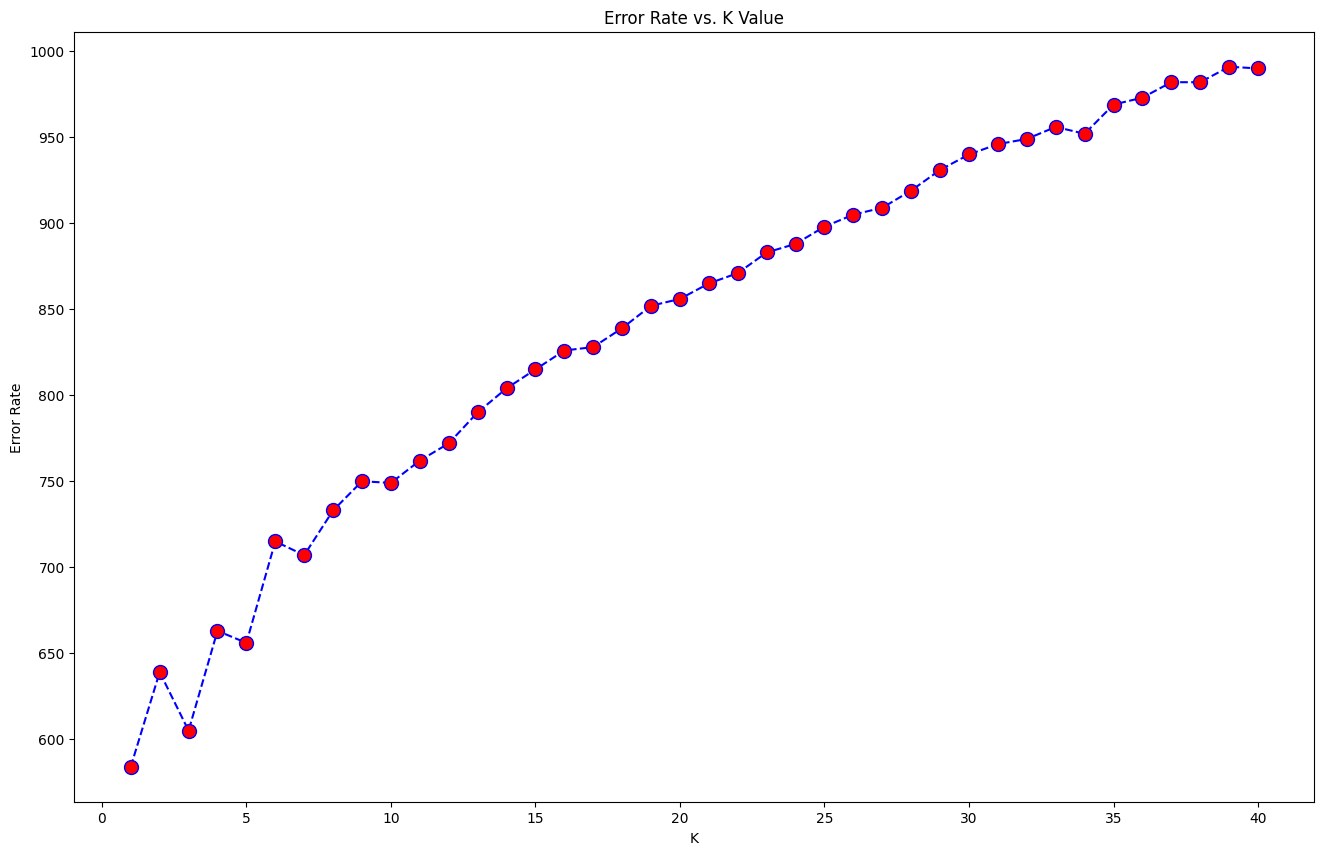

In [44]:
error_rate = []

# Will take some time
for i in range(1,41):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(sum((pred_i != y_test)))

plt.figure(figsize=(16,10))
plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [45]:
model6 = KNeighborsClassifier(n_neighbors=3)
model6.fit(X_train,y_train)
pred = model6.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score:", accuracy)
print(classification_report(y_test,pred))

Accuracy Score: 0.9462985975501509
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      6741
         1.0       0.89      0.70      0.79       700
         2.0       0.94      0.92      0.93      1709
         3.0       0.85      0.69      0.76       202
         4.0       0.98      0.97      0.97      1914

    accuracy                           0.95     11266
   macro avg       0.92      0.85      0.88     11266
weighted avg       0.95      0.95      0.94     11266

